In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing  import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [151]:
df = pd.read_csv('/Users/saptarshipal/DATA/laptop_price_prediction/data/Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [152]:
df.shape

(1000, 7)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


#### No null values in the data.

In [154]:
df.nunique()

Brand                  5
Processor_Speed     1000
RAM_Size               4
Storage_Capacity       3
Screen_Size         1000
Weight              1000
Price               1000
dtype: int64

In [155]:
df1 = df.copy()

# Visualisation

Axes(0.125,0.11;0.775x0.77)


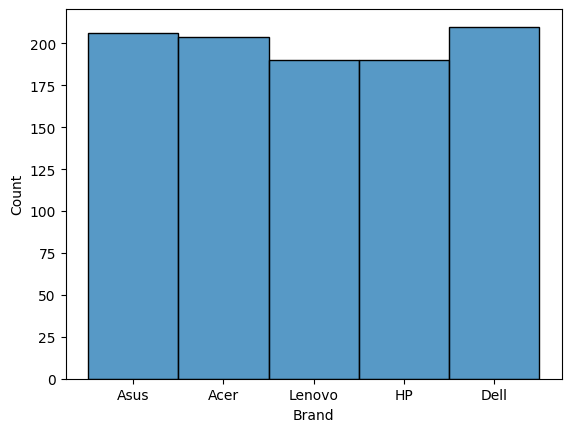

Axes(0.125,0.11;0.775x0.77)


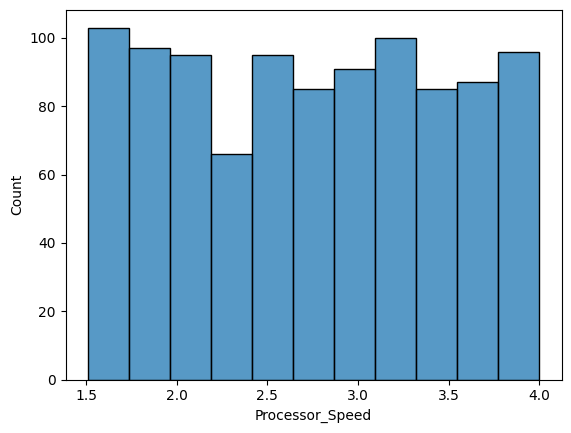

Axes(0.125,0.11;0.775x0.77)


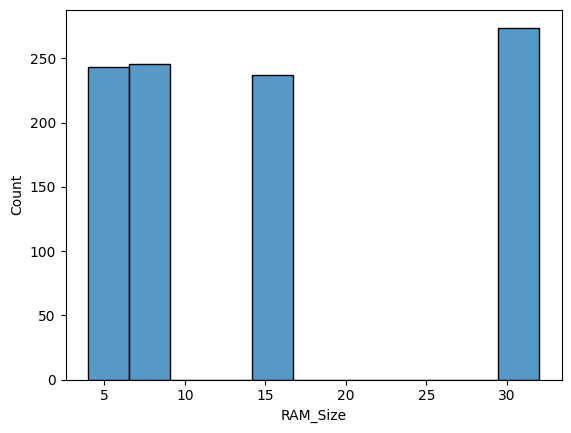

Axes(0.125,0.11;0.775x0.77)


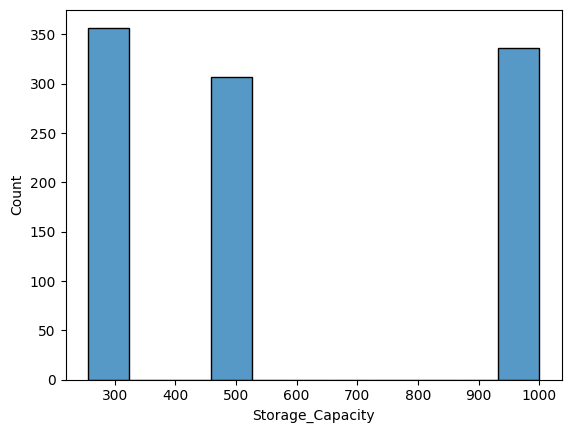

Axes(0.125,0.11;0.775x0.77)


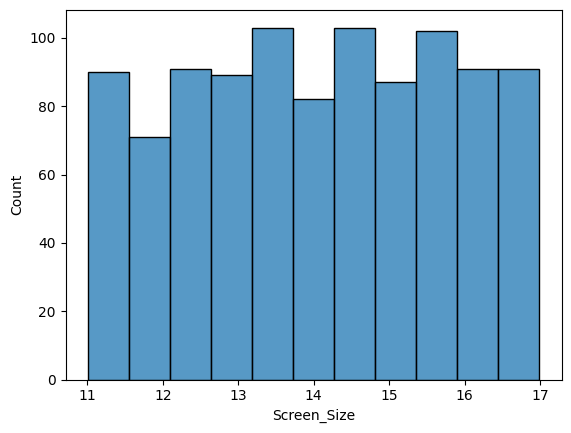

Axes(0.125,0.11;0.775x0.77)


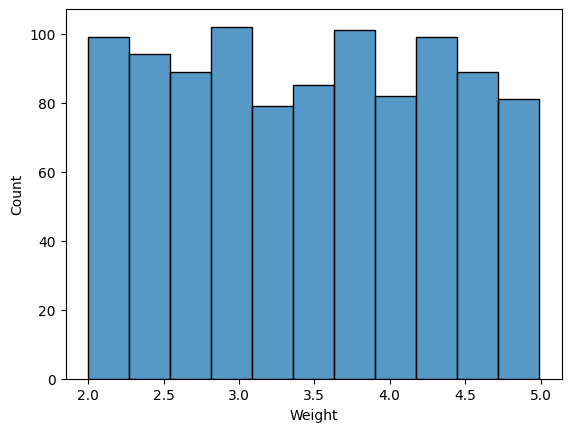

Axes(0.125,0.11;0.775x0.77)


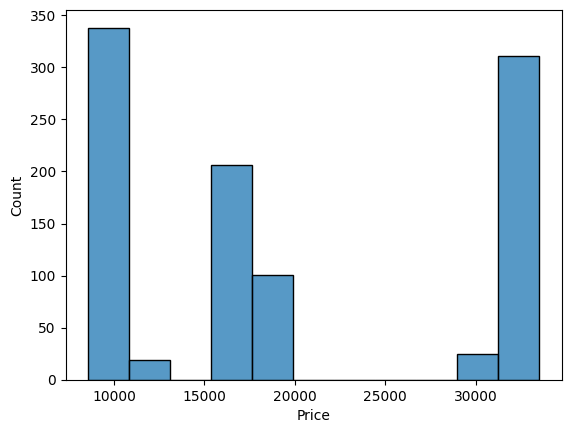

In [156]:
for i in df1.columns:
    
    print(sns.histplot(df1[i]))
    plt.show()

In [157]:
df1.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

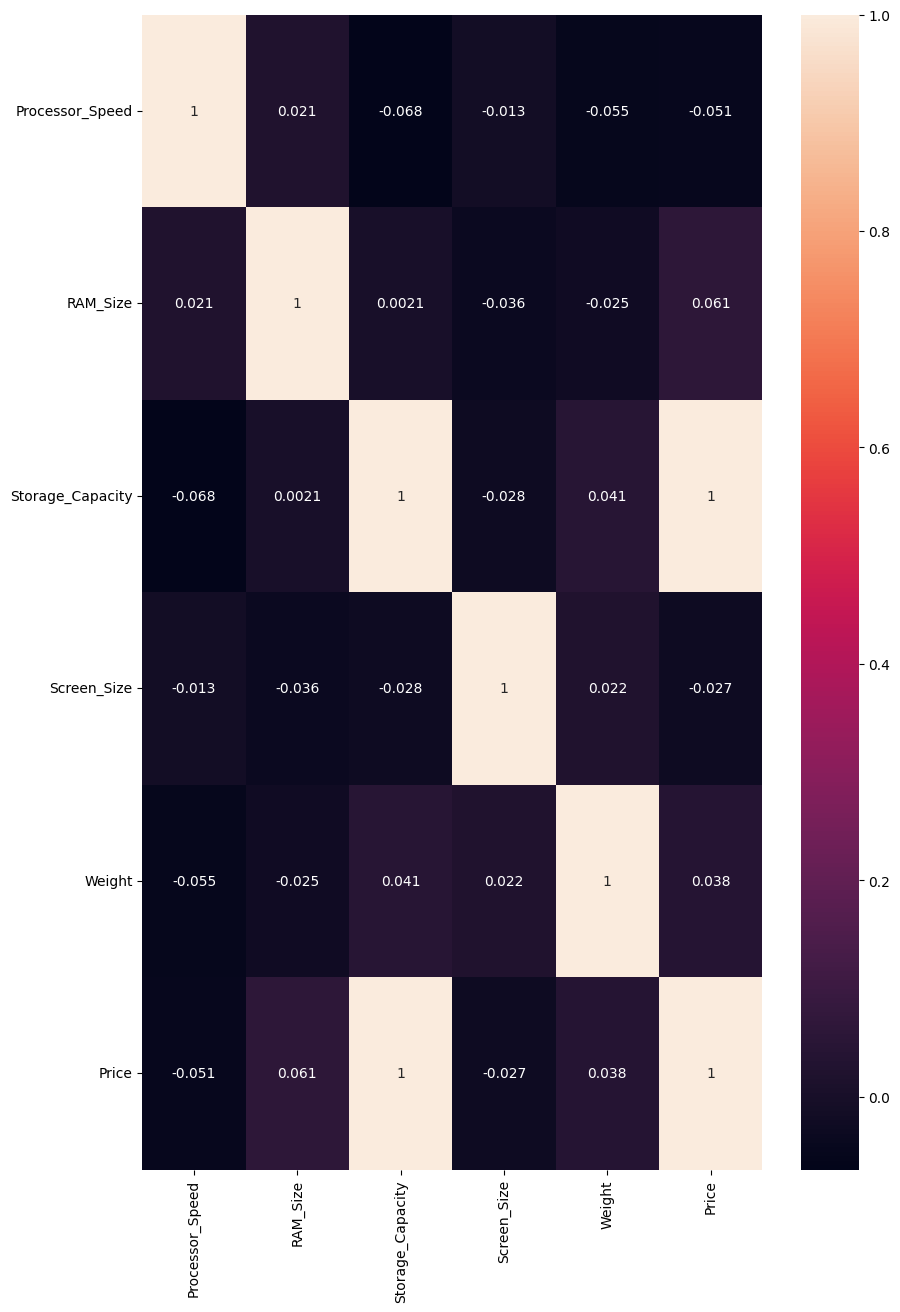

In [158]:
plt.figure(figsize=[10,15])
sns.heatmap(df1[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size',
       'Weight', 'Price']].corr(),annot=True)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

### Storage Capacity is the only column which has high correlation with Price. This means Price increases as the Storage_capacity increases and vice_versa. 

# Encoding

In [159]:
df1 = pd.get_dummies(data = df1,columns = ['Brand'],dtype='int')

# Splitting the dataset into X and y

In [160]:


y = df1['Price']
X = df1.drop(columns='Price', axis =1)

print(y.shape,X.shape)

(1000,) (1000, 10)


# Train test split

In [161]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=6789)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 10) (200, 10) (800,) (200,)


# Scaling

In [162]:
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train_sc,columns = X_train.columns)
X_test = pd.DataFrame(X_test_sc, columns = X_test.columns)

# Modelling

In [163]:
model = Lasso()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test,y_pred)
print(f'The score of the model is {score}')



The score of the model is 0.999471714916472


# Printing the results of the model

In [164]:

df_comp = pd.DataFrame({'y_pred':y_pred,'y_test':y_test}).round(2)
print(df_comp)

       y_pred    y_test
48   31512.38  31673.70
584   9031.91   9087.07
721  17193.01  17128.66
209  10676.71  10622.18
611   9494.52   9431.37
..        ...       ...
223  18013.36  17880.00
624  31542.23  31522.50
172  32096.48  31802.52
625   9813.24   9642.71
503   9295.99   9365.56

[200 rows x 2 columns]
